In [1]:
# imports
# import numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [23]:
# model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [4]:
# cross validation
from sklearn.model_selection import train_test_split


In [5]:
#data
#rawData = pd.read_csv('default_of_credit_card_clients.csv')
rawData = pd.read_csv('credit_no_id.csv')
pd.read_csv
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_BINS,AGE_BY_DECADE
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,"(20, 29]",20s
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,"(20, 29]",20s
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,"(29, 39]",30s
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,"(29, 39]",30s
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,"(49, 59]",50s


In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
# convert some of the int variables to categorical variables
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['PAY_0'] = rawData['PAY_0'].astype('category')
rawData['PAY_2'] = rawData['PAY_2'].astype('category')
rawData['PAY_3'] = rawData['PAY_3'].astype('category')
rawData['PAY_4'] = rawData['PAY_4'].astype('category')
rawData['PAY_5'] = rawData['PAY_5'].astype('category')
rawData['PAY_6'] = rawData['PAY_6'].astype('category')
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [8]:
# Create new dataframe and then drop ID column
credit_no_id = rawData
credit_no_id.info
credit_no_id.drop('AGE_BINS',axis=1,inplace=True)
credit_no_id.drop('AGE_BY_DECADE',axis=1,inplace=True)
credit_no_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [9]:
#features
features = credit_no_id.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [10]:
#dependent variable
depVar = credit_no_id['default payment next month']

In [11]:
#Training Set (Feature Space: X Training)
X = features   
y = depVar

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state = 10)

x_train_count = len(X_train.index)
print('The number of observations in the X training set are:',str(x_train_count))
X_train.head()

The number of observations in the X training set are: 21000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19147,200000,2,3,2,29,-1,-1,-1,-1,0,...,12555,882,882,0,7485,12625,882,0,0,0
5380,20000,1,2,2,23,1,2,0,0,0,...,19447,19312,17987,17822,1500,1500,1000,1000,1000,1000
15486,180000,1,2,2,43,-1,-1,-2,-2,-2,...,2378,10396,2527,2173,5739,2385,10427,2534,2179,13903
19794,180000,2,2,1,39,-1,-1,0,-1,0,...,11867,8111,6312,3739,11662,6003,8111,273,3739,6547
11102,290000,2,2,2,29,-2,-1,-1,-1,-1,...,0,302,390,1278,1591,0,302,390,1278,0


In [12]:
#Dependent Variable Training Set (y Training)
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


19147    0
5380     0
15486    0
19794    0
11102    0
Name: default payment next month, dtype: int64

In [13]:
#Testing Set (X Testing)
#X_test = X[-X_train:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
20412     160000    1          1         2   26     -1     -1     -1     -1   
1296       50000    1          2         2   29      1      2      2      2   
3906      380000    2          1         1   33      0      0      0      0   
20454     400000    1          1         2   26      0      0      0      0   
5200       60000    2          1         2   34      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
20412     -1  ...      15193      10845      46397      32334     15134   
1296       0  ...      39863      38924      39744      40533         0   
3906       0  ...     216399     213259     203377     185056      4677   
20454      0  ...     161585     146093     129047      75427      8006   
5200       0  ...      41087      25518      26276      27012      2178   

       PAY_

In [14]:
#Establish Ground truth 
#Ground Truth (y_test) 
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


20412    0
1296     0
3906     0
20454    0
5200     1
Name: default payment next month, dtype: int64

In [16]:
#crossvalidation
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape


((21000, 23), (9000, 23))

In [17]:
#Models
modelSVR = SVR()
modelRF = RandomForestClassifier(n_estimators=10)
modelgnb = GaussianNB()
modelSVM = SVC(kernel="rbf")



In [18]:
#RandomForest
modelRF.fit(X_train,y_train)
RFpred = modelRF.predict( X_test )

RFcm = confusion_matrix( y_test, RFpred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((RFcm[0,0] + RFcm[1,1] )/len(X_test)))
scoresRF = cross_val_score( modelRF, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

Accuracy on Test Set for RandomForest = 0.80
Mean RandomForest CrossVal Accuracy on Train Set 0.80, with std=0.01


In [25]:
RFprecision = precision_score(y_test, RFpred)
print(RFprecision)

0.6196754563894523


In [26]:
RFrecall = recall_score(y_test, RFpred)
print(RFrecall)

0.30277502477700696


In [19]:
# kernel SVM 

modelSVM.fit( X_train, y_train )
SVMpred = modelSVM.predict( X_test )

SVMcm = confusion_matrix( y_test, SVMpred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((SVMcm[0,0] + SVMcm[1,1] )/len(X_test)))
scoresSVM = cross_val_score( modelSVM, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVM.mean(), scoresSVM.std() ))

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on Test Set for kernel-SVM = 0.78


C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Mean kernel-SVM CrossVal Accuracy on Train Set 0.78, with std=0.00


In [27]:
SVMprecision = precision_score(y_test, SVMpred)
print(SVMprecision)

0.5151515151515151


In [28]:
SVMrecall = recall_score(y_test, SVMpred)
print(SVMrecall)

0.00842418235877106


In [29]:
# Naive Bayes 
modelgnb.fit( X_train, y_train )
gnbpred = modelgnb.predict( X_test )

gnbcm = confusion_matrix( y_test, gnbpred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((gnbcm[0,0] + gnbcm[1,1] )/len(X_test)))
scoresgnb = cross_val_score( modelgnb, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresgnb.mean(), scoresgnb.std() ))

Accuracy on Test Set for NBClassifier = 0.37
Mean NaiveBayes CrossVal Accuracy on Train Set 0.38, with std=0.01


In [30]:
gnbprecision = precision_score(y_test, gnbpred)
print(gnbprecision)

0.2493467198459634


In [31]:
gnbrecall = recall_score(y_test, gnbpred)
print(gnbrecall)

0.8984142715559961


In [32]:
# Obtain training score
print(cross_val_score(modelRF, X_train, y_train)) 

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80502785 0.80314286 0.80311473]


In [33]:
#1. Random Forest Regression Model Fitting and Scoring
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80574204 0.80342857 0.80368624]


0.9784761904761905

In [34]:
#2.Support Vector Regression Model Fitting and Scoring
modelSVM.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVM.score(X_train,y_train)

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

[-0.01661222 -0.02347867 -0.02186968]


0.9935238095238095

In [35]:
#3. Naive Bayes Model Fitting and Scoring
modelgnb.fit(X_train,y_train)
print(cross_val_score(modelgnb, X_train, y_train)) 
modelgnb.score(X_train,y_train)

[0.37308956 0.36585714 0.38719817]


C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.3769523809523809

In [38]:
#predictions: RF is the chosen model for predictions.
RFpred
RFpred[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
y_test.head()


20412    0
1296     0
3906     0
20454    0
5200     1
Name: default payment next month, dtype: int64

In [40]:
len(y_test)

9000

In [41]:
# Create confusion matrix
pd.crosstab(y_test, RFpred, rownames=['Actual Numbers'], colnames=['Predicted Numbers'])

Predicted Numbers,0,1
Actual Numbers,,
0,6607,375
1,1407,611


In [42]:
# View a list of the features and their importance scores
list(zip(X_train, modelRF.feature_importances_))

[('LIMIT_BAL', 0.05906006009292497),
 ('SEX', 0.012019932248512442),
 ('EDUCATION', 0.021148625920430212),
 ('MARRIAGE', 0.014166291634911066),
 ('AGE', 0.0672197005380462),
 ('PAY_0', 0.10164017745652332),
 ('PAY_2', 0.034783069419424925),
 ('PAY_3', 0.028617904002371207),
 ('PAY_4', 0.025926023697983885),
 ('PAY_5', 0.022684700959741816),
 ('PAY_6', 0.014369622105581464),
 ('BILL_AMT1', 0.06106897815451113),
 ('BILL_AMT2', 0.054565603206395),
 ('BILL_AMT3', 0.053925331865519475),
 ('BILL_AMT4', 0.04993552808077235),
 ('BILL_AMT5', 0.04883058397336658),
 ('BILL_AMT6', 0.050856560974007786),
 ('PAY_AMT1', 0.05156374060523061),
 ('PAY_AMT2', 0.04787800397543937),
 ('PAY_AMT3', 0.04542172065707251),
 ('PAY_AMT4', 0.042869747680991215),
 ('PAY_AMT5', 0.04117192322014824),
 ('PAY_AMT6', 0.05027616953009401)]

In [43]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, RFpred))

Accuracy: 0.802


In [44]:
feature_imp = pd.Series(modelRF.feature_importances_).sort_values(ascending=False)
feature_imp

5     0.101640
4     0.067220
11    0.061069
0     0.059060
12    0.054566
13    0.053925
17    0.051564
16    0.050857
22    0.050276
14    0.049936
15    0.048831
18    0.047878
19    0.045422
20    0.042870
21    0.041172
6     0.034783
7     0.028618
8     0.025926
9     0.022685
2     0.021149
10    0.014370
3     0.014166
1     0.012020
dtype: float64

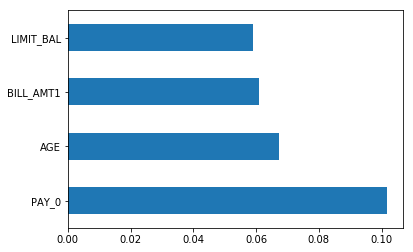

In [52]:
feat_importances = pd.Series(modelRF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

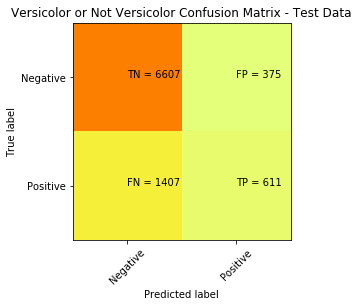

In [45]:
plt.clf()
plt.imshow(RFcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(RFcm[i][j]))
plt.show()

In [46]:
# Evaluate the results
print(classification_report(y_test, RFpred))
           

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6982
           1       0.62      0.30      0.41      2018

    accuracy                           0.80      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.80      0.77      9000



In [50]:
RFpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

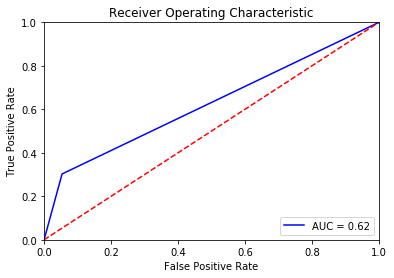

In [37]:
# Plot AUC
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, RFpred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()